In [87]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from utils.plot_utils import set_fontsize
from utils.hdf_utils import load_measurement_data_devices
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, average_binned_data, bin_dataset_switching

In [4]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

In [5]:
fname = "2020_3_4_rotational_cooling_microwaves.hdf"
dset_name = "1583371342 scan_microwave_frequency_while_shuttering_rotational_cooling_light"
devices = ('Laser Lock', 'Wavelength', 'ZaberTMM', 'SynthHDPro')

In [24]:
pxie, pxie_time, data_devices = load_measurement_data_devices(fname, dset_name, devices)

In [241]:
idx = 48
-np.trapz(pxie[idx][250:1900, ch]-np.mean(pxie[idx][50:200, ch]))

54544.48000000072

In [38]:
ch = 1
pmt_channel = 1
switching_channel = 2
threshold = 500

In [39]:
switch_state = {idx_pxie:traces[:,switching_channel].mean() > threshold for idx_pxie, traces in pxie.items()}

In [41]:
idx_pairs = {idx_pxie: find_nearest_idx(data_devices['SynthHDPro']['time'], t_pxie) for idx_pxie, t_pxie in pxie_time.items()}

In [151]:
integrals_unsorted = [-np.trapz(pxie[idx][250:1900, ch]-np.mean(pxie[idx][50:200, ch])) for idx in range(1, max(pxie_time.keys())+1)]

In [149]:
sorted_pxie_indices = np.array(list(idx_pairs.keys()))
sorted_pxie_indices.sort()
integrals, freqs = combine_arrays_irregular(sorted_pxie_indices-1, integrals_unsorted, 
                                            [idx_pairs[idx] for idx in sorted_pxie_indices], data_devices['SynthHDPro']['frequency'])

In [72]:
bins, bin_data_idx = bin_data(list(switch_state.values()), list(pxie.keys()))

In [156]:
freqs_light_off = np.array(freqs)[np.array(bin_data_idx[0]).astype(int)-1]
freqs_light_on = np.array(freqs)[np.array(bin_data_idx[1]).astype(int)-1]

integrals_light_off = [integrals[idx-1] for idx in bin_data_idx[0]]
integrals_light_on = [integrals[idx-1] for idx in bin_data_idx[1]]

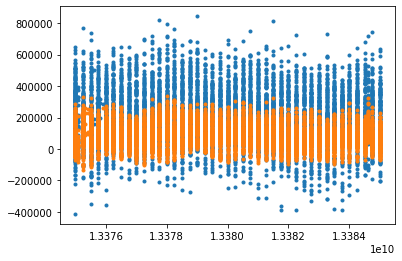

In [161]:
plt.plot(freqs_light_on, integrals_light_on, '.')
plt.plot(freqs_light_off, integrals_light_off, '.')

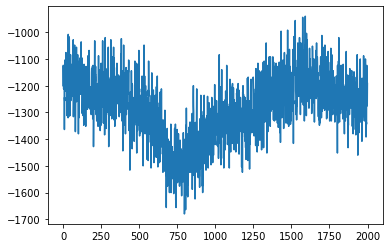

In [244]:
plt.plot(pxie[43][:,1])

In [210]:
def filter_negative_integrals(binned_data):
    filtered_data = {}
    for b, data in binned_data.items():
        filtered_data[b] = [d for d in data if d > 0]
    return filtered_data

In [211]:
bins_light_off, bin_data_light_off = bin_data(freqs_light_off, integrals_light_off, width = 250e3)
bins_light_on, bin_data_light_on = bin_data(freqs_light_on, integrals_light_on, width = 250e3)
bin_data_light_off = filter_negative_integrals(bin_data_light_off)
bin_data_light_on = filter_negative_integrals(bin_data_light_on)

bin_data_light_off_avg = average_binned_data(bins_light_off, bin_data_light_off)
bin_data_light_on_avg = average_binned_data(bins_light_on, bin_data_light_on)

<BarContainer object of 41 artists>

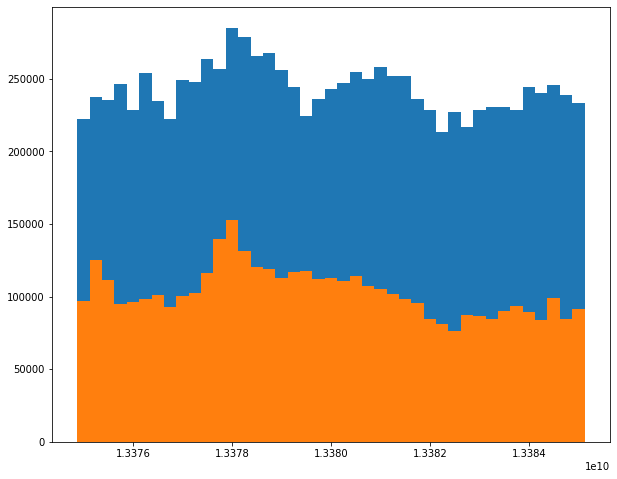

In [212]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(bins_light_on, [bin_data_light_on_avg[b][0] for b in bins_light_on], width = 250e3)
ax.bar(bins_light_off, [bin_data_light_off_avg[b][0] for b in bins_light_off], width = 250e3)


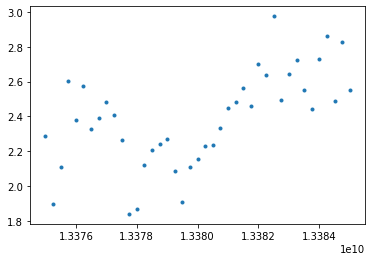

In [213]:
plt.plot(bins_light_on, np.array([bin_data_light_on_avg[b][0] for b in bins_light_on])/np.array([bin_data_light_off_avg[b][0] for b in bins_light_off]), '.')

In [272]:
fname = "2020_3_5_rotational_cooling_with_microwaves.hdf"
dset_name = "1583447420 depletion_measurement_scan_microwave_frequency_while_shuttering_rotational_cooling"
devices = ('Laser Lock', 'Wavelength', 'ZaberTMM', 'SynthHDPro')

In [273]:
pxie, pxie_time, data_devices = load_measurement_data_devices(fname, dset_name, devices)

In [274]:
ch = 1
pmt_channel = 1
switching_channel = 2
threshold = 500

In [275]:
switch_state = {idx_pxie:traces[:,switching_channel].mean() > threshold for idx_pxie, traces in pxie.items()}
idx_pairs = {idx_pxie: find_nearest_idx(data_devices['SynthHDPro']['time'], t_pxie) for idx_pxie, t_pxie in pxie_time.items()}
integrals_unsorted = [-np.trapz(pxie[idx][250:1900, ch]-np.mean(pxie[idx][50:200, ch])) for idx in range(1, max(pxie_time.keys())+1)]

In [276]:
sorted_pxie_indices = np.array(list(idx_pairs.keys()))
sorted_pxie_indices.sort()
integrals, freqs = combine_arrays_irregular(sorted_pxie_indices-1, integrals_unsorted, 
                                            [idx_pairs[idx] for idx in sorted_pxie_indices], data_devices['SynthHDPro']['frequency'])

In [277]:
bins, bin_data_idx = bin_data(list(switch_state.values()), list(pxie.keys()))

In [278]:
freqs_light_off = np.array(freqs)[np.array(bin_data_idx[0]).astype(int)-1]
freqs_light_on = np.array(freqs)[np.array(bin_data_idx[1]).astype(int)-1]

integrals_light_off = [integrals[idx-1] for idx in bin_data_idx[0]]
integrals_light_on = [integrals[idx-1] for idx in bin_data_idx[1]]

In [279]:
bins_light_off, bin_data_light_off = bin_data(freqs_light_off, integrals_light_off, width = 1e6)
bins_light_on, bin_data_light_on = bin_data(freqs_light_on, integrals_light_on, width = 1e6)
bin_data_light_off = filter_negative_integrals(bin_data_light_off)
bin_data_light_on = filter_negative_integrals(bin_data_light_on)

bin_data_light_off_avg = average_binned_data(bins_light_off, bin_data_light_off)
bin_data_light_on_avg = average_binned_data(bins_light_on, bin_data_light_on)

<BarContainer object of 61 artists>

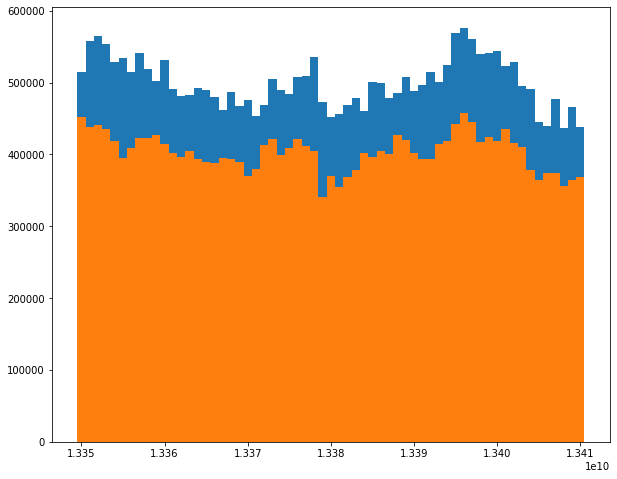

In [280]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(bins_light_on, [bin_data_light_on_avg[b][0] for b in bins_light_on], width = 1e6)
ax.bar(bins_light_off, [bin_data_light_off_avg[b][0] for b in bins_light_off], width = 1e6)


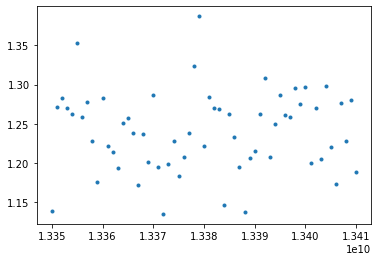

In [282]:
plt.plot(bins_light_on, np.array([bin_data_light_on_avg[b][0] for b in bins_light_on])/np.array([bin_data_light_off_avg[b][0] for b in bins_light_off]), '.')

In [283]:
fname = "2020_3_5_rotational_cooling_with_microwaves.hdf"
dset_name = "1583453143 depletion_measurement_super_broad_scan"
devices = ('Laser Lock', 'Wavelength', 'ZaberTMM', 'SynthHDPro')

In [284]:
pxie, pxie_time, data_devices = load_measurement_data_devices(fname, dset_name, devices)

In [285]:
ch = 1
pmt_channel = 1
switching_channel = 2
threshold = 500

In [286]:
switch_state = {idx_pxie:traces[:,switching_channel].mean() > threshold for idx_pxie, traces in pxie.items()}
idx_pairs = {idx_pxie: find_nearest_idx(data_devices['SynthHDPro']['time'], t_pxie) for idx_pxie, t_pxie in pxie_time.items()}
integrals_unsorted = [-np.trapz(pxie[idx][250:1900, ch]-np.mean(pxie[idx][50:200, ch])) for idx in range(1, max(pxie_time.keys())+1)]

In [287]:
sorted_pxie_indices = np.array(list(idx_pairs.keys()))
sorted_pxie_indices.sort()
integrals, freqs = combine_arrays_irregular(sorted_pxie_indices-1, integrals_unsorted, 
                                            [idx_pairs[idx] for idx in sorted_pxie_indices], data_devices['SynthHDPro']['frequency'])

In [288]:
bins, bin_data_idx = bin_data(list(switch_state.values()), list(pxie.keys()))

In [289]:
freqs_light_off = np.array(freqs)[np.array(bin_data_idx[0]).astype(int)-1]
freqs_light_on = np.array(freqs)[np.array(bin_data_idx[1]).astype(int)-1]

integrals_light_off = [integrals[idx-1] for idx in bin_data_idx[0]]
integrals_light_on = [integrals[idx-1] for idx in bin_data_idx[1]]

In [310]:
bins_light_off, bin_data_light_off = bin_data(freqs_light_off, integrals_light_off, width = 1e6)
bins_light_on, bin_data_light_on = bin_data(freqs_light_on, integrals_light_on, width = 1e6)
bin_data_light_off = filter_negative_integrals(bin_data_light_off)
bin_data_light_on = filter_negative_integrals(bin_data_light_on)

bin_data_light_off_avg = average_binned_data(bins_light_off, bin_data_light_off)
bin_data_light_on_avg = average_binned_data(bins_light_on, bin_data_light_on)

<BarContainer object of 201 artists>

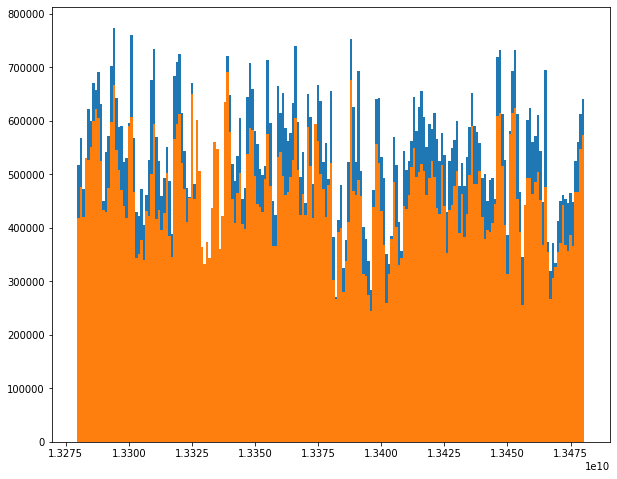

In [311]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(bins_light_on, [bin_data_light_on_avg[b][0] for b in bins_light_on], width = 1e6)
ax.bar(bins_light_off, [bin_data_light_off_avg[b][0] for b in bins_light_off], width = 1e6)

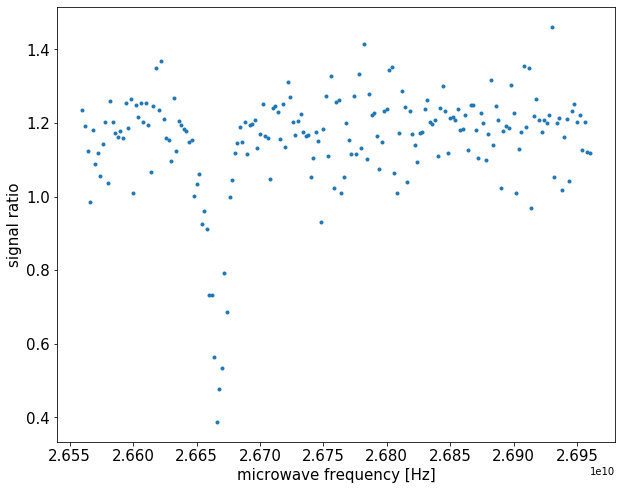

In [312]:
fig, ax = plt.subplots(figsize = (10,8))

ax.plot(bins_light_on*2, 
            np.array([bin_data_light_on_avg[b][0] for b in bins_light_on])/np.array([bin_data_light_off_avg[b][0] for b in bins_light_off]),
            '.')
ax.set_xlabel('microwave frequency [Hz]')
ax.set_ylabel('signal ratio')

set_fontsize(ax, 15)

fig.savefig('microwave scan.png', dpi = 300)

In [151]:
def filter_negative_integrals(binned_data):
    filtered_data = {}
    for b, data in binned_data.items():
        filtered_data[b] = [d for d in data if d > 0]
    return filtered_data

In [152]:
fname = "2020_3_11.hdf"
dset_name = "1583956319 scan_J1_J2"
devices = ('Laser Lock', 'Wavelength', 'ZaberTMM', 'SynthHDPro')

In [153]:
pxie, pxie_time, data_devices = load_measurement_data_devices(fname, dset_name, devices)

In [154]:
ch = 2
pmt_channel = 2
switching_channel = 3
threshold = 500

In [155]:
switch_state = {idx_pxie:traces[:,switching_channel].mean() > threshold for idx_pxie, traces in pxie.items()}
idx_pairs = {idx_pxie: find_nearest_idx(data_devices['SynthHDPro']['time'], t_pxie) for idx_pxie, t_pxie in pxie_time.items()}
integrals_unsorted = [-np.trapz(pxie[idx][250:1900, ch]-np.mean(pxie[idx][50:200, ch])) for idx in range(1, max(pxie_time.keys())+1)]

In [156]:
sorted_pxie_indices = np.array(list(idx_pairs.keys()))
sorted_pxie_indices.sort()
integrals, freqs = combine_arrays_irregular(sorted_pxie_indices-1, integrals_unsorted, 
                                            [idx_pairs[idx] for idx in sorted_pxie_indices], data_devices['SynthHDPro']['frequency'])

In [157]:
bins, bin_data_idx = bin_data(list(switch_state.values()), list(pxie.keys()))

In [158]:
freqs_light_off = np.array(freqs)[np.array(bin_data_idx[0]).astype(int)-1]
freqs_light_on = np.array(freqs)[np.array(bin_data_idx[1]).astype(int)-1]

integrals_light_off = [integrals[idx-1] for idx in bin_data_idx[0]]
integrals_light_on = [integrals[idx-1] for idx in bin_data_idx[1]]

traces_light_off = [pxie[idx] for idx in bin_data_idx[0]]
traces_light_on = [pxie[idx] for idx in bin_data_idx[1]]

In [159]:
width = 750e3
bins_light_off, bin_data_light_off = bin_data(freqs_light_off, integrals_light_off, width = width)
bins_light_on, bin_data_light_on = bin_data(freqs_light_on, integrals_light_on, width = width)
bin_data_light_off = filter_negative_integrals(bin_data_light_off)
bin_data_light_on = filter_negative_integrals(bin_data_light_on)

bin_data_light_off_avg = average_binned_data(bins_light_off, bin_data_light_off)
bin_data_light_on_avg = average_binned_data(bins_light_on, bin_data_light_on)

In [160]:
width = 750e3
bins_light_off_trace, bin_data_light_off_trace = bin_data(freqs_light_off, traces_light_off, width = width)
bins_light_on_trace, bin_data_light_on_trace = bin_data(freqs_light_on, traces_light_on, width = width)

# bin_data_light_off_avg = average_binned_data(bins_light_off, bin_data_light_off)
# bin_data_light_on_avg = average_binned_data(bins_light_on, bin_data_light_on)

1.3314e+01 GHz


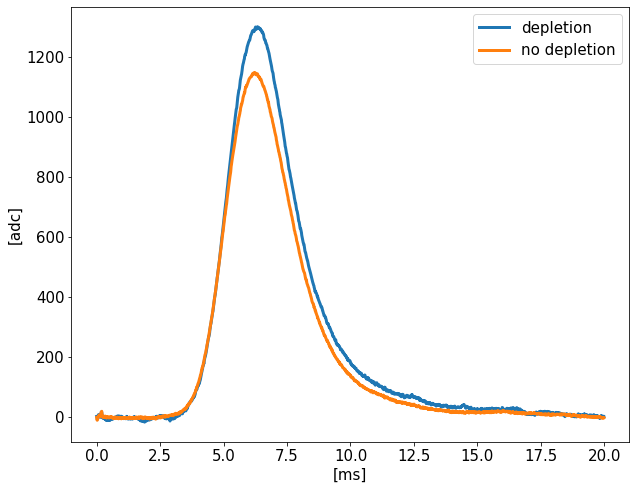

In [161]:
idx = 19
frequency = list(bin_data_light_on_trace.keys())[idx]
background_subtraction = lambda x: x - np.mean(np.concatenate((x[50:200], x[-150:])))

print(f'{frequency/1e9:2.4e} GHz')

t = np.arange(0,20,1e-2)

depletion = -np.mean(bin_data_light_on_trace[frequency],axis = 0)[:,pmt_channel] 
no_depletion = -np.mean(bin_data_light_off_trace[frequency],axis = 0)[:,pmt_channel]

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(depletion), label = 'depletion', lw = 3)
ax.plot(t, background_subtraction(no_depletion), label = 'no depletion', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

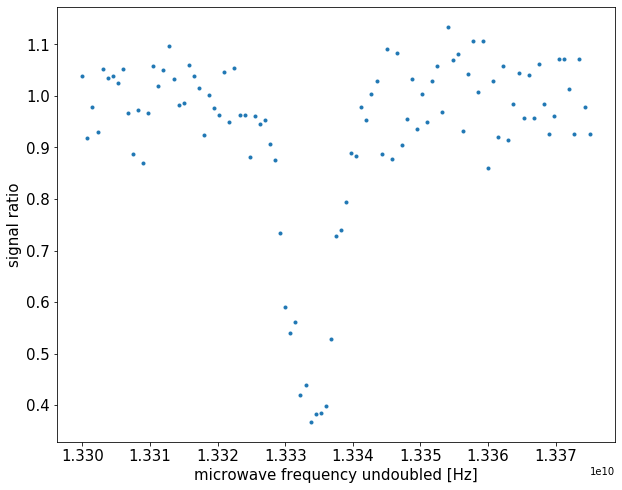

In [163]:
fig, ax = plt.subplots(figsize = (10,8))

# factor 1.2 is from enhanced pmt sensitivity when more light hits it.

ax.plot(bins_light_on, 
            np.array([bin_data_light_on_avg[b][0] for b in bins_light_on])/np.array([bin_data_light_off_avg[b][0] for b in bins_light_off])/1.2,
            '.')
ax.set_xlabel('microwave frequency undoubled [Hz]')
ax.set_ylabel('signal ratio')

set_fontsize(ax, 15)

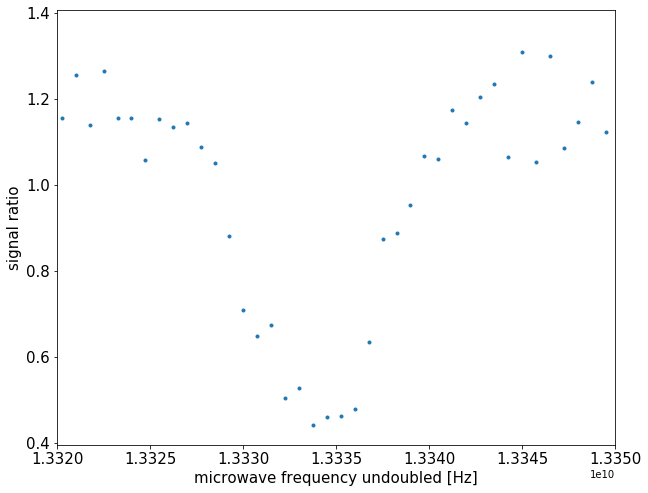

In [28]:
fig, ax = plt.subplots(figsize = (10,8))

ax.plot(bins_light_on, 
            np.array([bin_data_light_on_avg[b][0] for b in bins_light_on])/np.array([bin_data_light_off_avg[b][0] for b in bins_light_off]),
            '.')
ax.set_xlabel('microwave frequency undoubled [Hz]')
ax.set_ylabel('signal ratio')

ax.set_xlim([1.332e10,1.335e10])

set_fontsize(ax, 15)

In [109]:
fname = "2020_3_11.hdf"
dset_name = "1583962824 repeat_last_measurement_no_microwaves"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

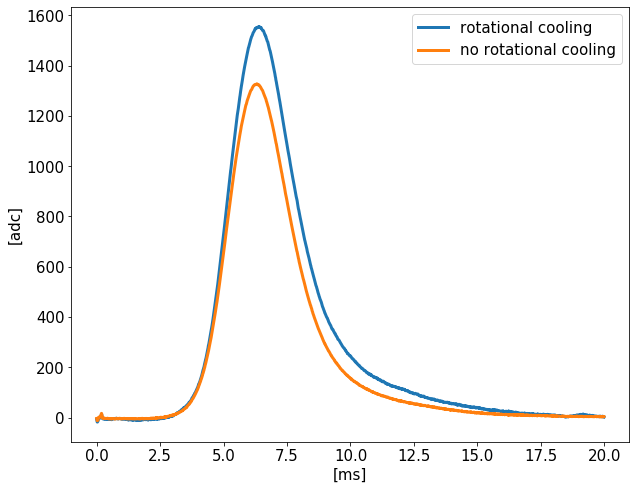

In [110]:
t = np.arange(0,20,1e-2)

rotational_cooling_res = np.mean(bin_state_data[1], axis = 0)
no_rotational_cooling_res = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(rotational_cooling_res), label = 'rotational cooling', lw = 3)
ax.plot(t, background_subtraction(no_rotational_cooling_res), label = 'no rotational cooling', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

In [103]:
fname = "2020_3_11.hdf"
dset_name = "1583963087 repeat_last_measurement_no_microwaves_P2_F1_off_resonance"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

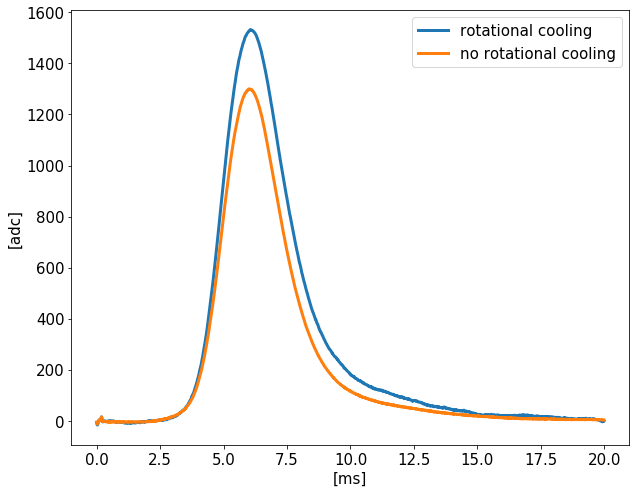

In [104]:
t = np.arange(0,20,1e-2)

rotational_cooling_offres = np.mean(bin_state_data[1], axis = 0)
no_rotational_cooling_offres = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(rotational_cooling_offres), label = 'rotational cooling', lw = 3)
ax.plot(t, background_subtraction(no_rotational_cooling_offres), label = 'no rotational cooling', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

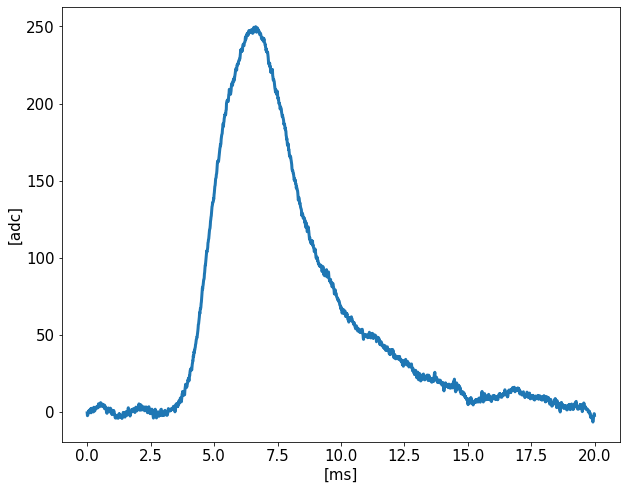

In [107]:
t = np.arange(0,20,1e-2)

rotational_cooling_offres = np.mean(bin_state_data[1], axis = 0)
no_rotational_cooling_offres = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, rotational_cooling_offres-no_rotational_cooling_offres, lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
set_fontsize(ax, 15)

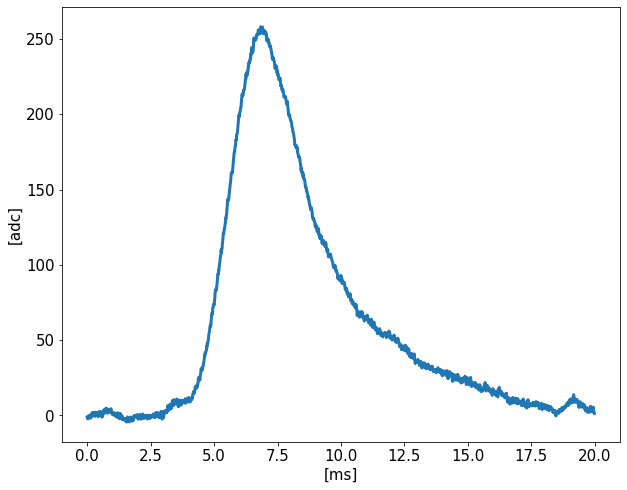

In [111]:
t = np.arange(0,20,1e-2)

rotational_cooling_res = np.mean(bin_state_data[1], axis = 0)
no_rotational_cooling_res = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, rotational_cooling_res-no_rotational_cooling_res, lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
set_fontsize(ax, 15)

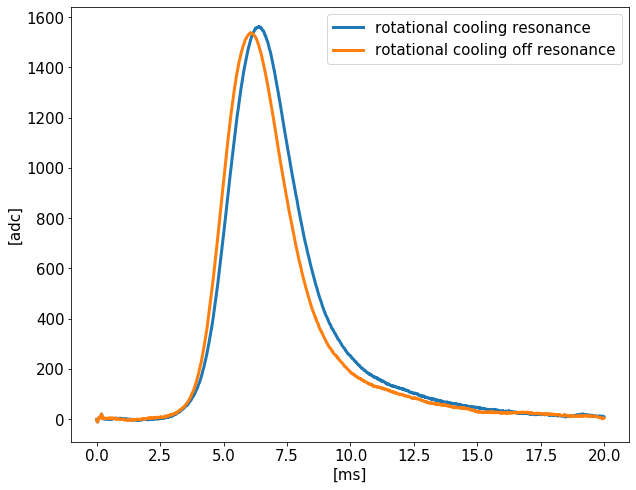

In [105]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, rotational_cooling_res, label = 'rotational cooling resonance', lw = 3)
ax.plot(t, rotational_cooling_offres, label = 'rotational cooling off resonance', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

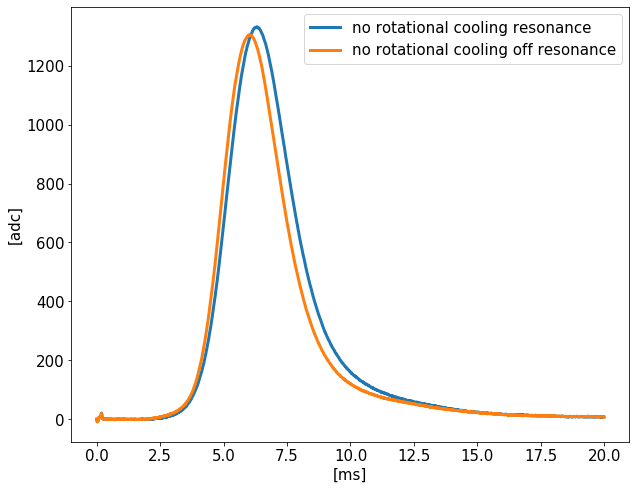

In [106]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, no_rotational_cooling_res, label = 'no rotational cooling resonance', lw = 3)
ax.plot(t, no_rotational_cooling_offres, label = 'no rotational cooling off resonance', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

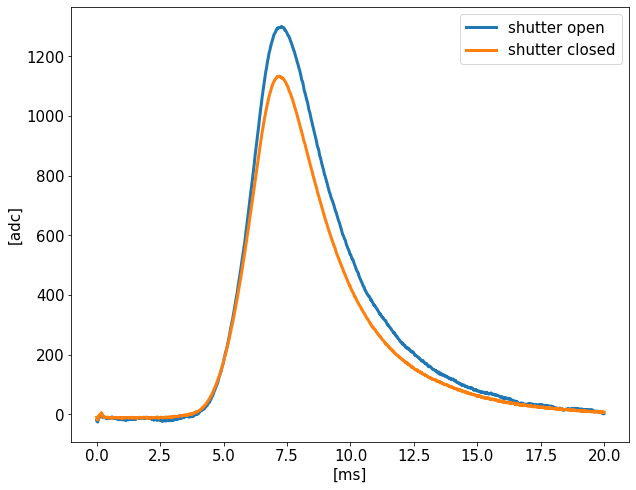

In [115]:
fname = "2020_3_11.hdf"
dset_name = "1583964644 repeat_last_measurement_no_microwaves_P2_F1_on_resonance_not_moving_mirror"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

t = np.arange(0,20,1e-2)

shutter_open = np.mean(bin_state_data[1], axis = 0)
shutter_closed = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(shutter_open), label = 'shutter open', lw = 3)
ax.plot(t, background_subtraction(shutter_closed), label = 'shutter closed', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

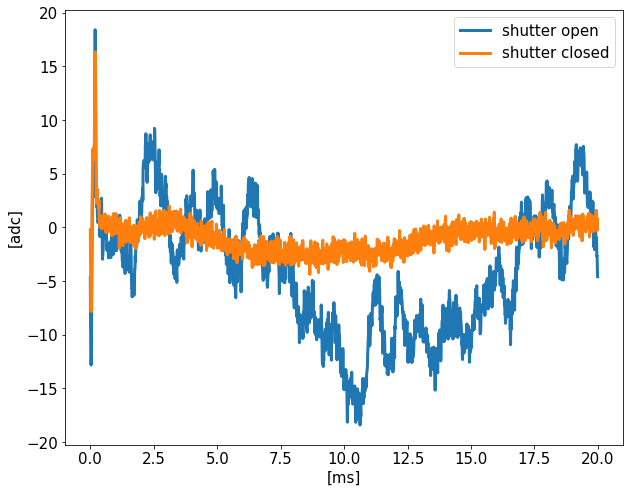

In [116]:
fname = "2020_3_11.hdf"
dset_name = "1583964849 det_light_off_switching_rot_cooling_onoff"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

t = np.arange(0,20,1e-2)

shutter_open = np.mean(bin_state_data[1], axis = 0)
shutter_closed = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(shutter_open), label = 'shutter open', lw = 3)
ax.plot(t, background_subtraction(shutter_closed), label = 'shutter closed', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

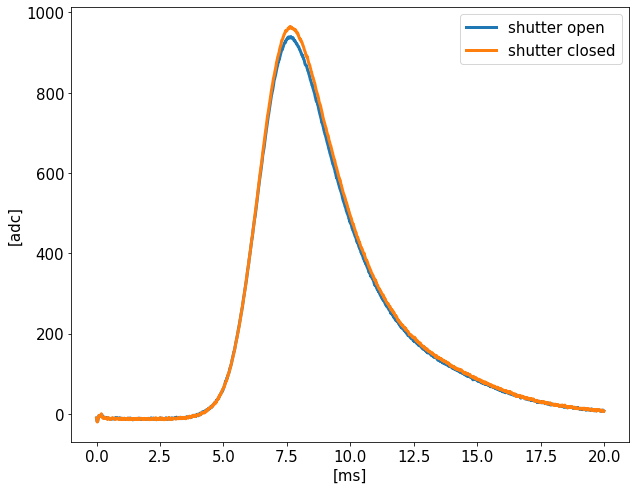

In [117]:
fname = "2020_3_11.hdf"
dset_name = "1583965045 rotational_cooling_off_shutter_running"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

t = np.arange(0,20,1e-2)

shutter_open = np.mean(bin_state_data[1], axis = 0)
shutter_closed = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(shutter_open), label = 'shutter open', lw = 3)
ax.plot(t, background_subtraction(shutter_closed), label = 'shutter closed', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

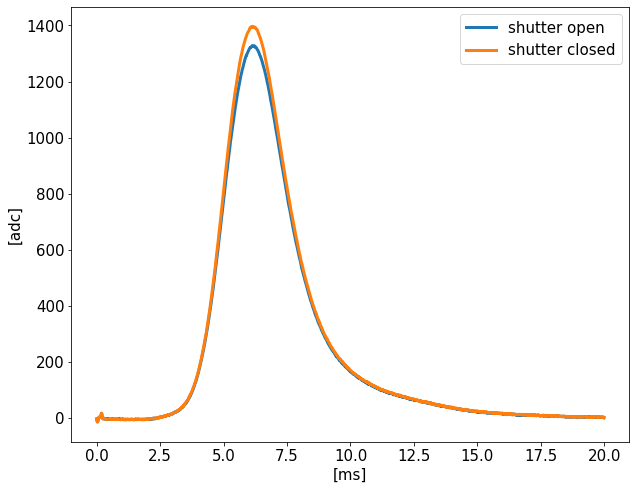

In [118]:
fname = "2020_3_11.hdf"
dset_name = "1583965161 rotational_cooling_off_shutter_running_sweeping_mirror"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

t = np.arange(0,20,1e-2)

shutter_open = np.mean(bin_state_data[1], axis = 0)
shutter_closed = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(shutter_open), label = 'shutter open', lw = 3)
ax.plot(t, background_subtraction(shutter_closed), label = 'shutter closed', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

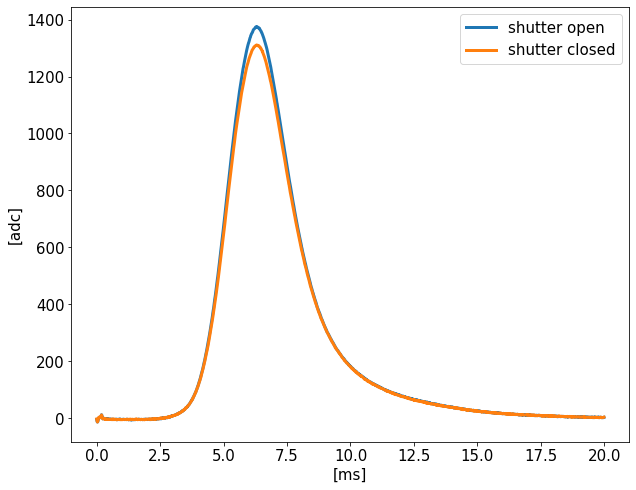

In [119]:
fname = "2020_3_11.hdf"
dset_name = "1583967651 single_pass_rot_cooling"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

t = np.arange(0,20,1e-2)

shutter_open = np.mean(bin_state_data[1], axis = 0)
shutter_closed = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(shutter_open), label = 'shutter open', lw = 3)
ax.plot(t, background_subtraction(shutter_closed), label = 'shutter closed', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

1.1279502649884052


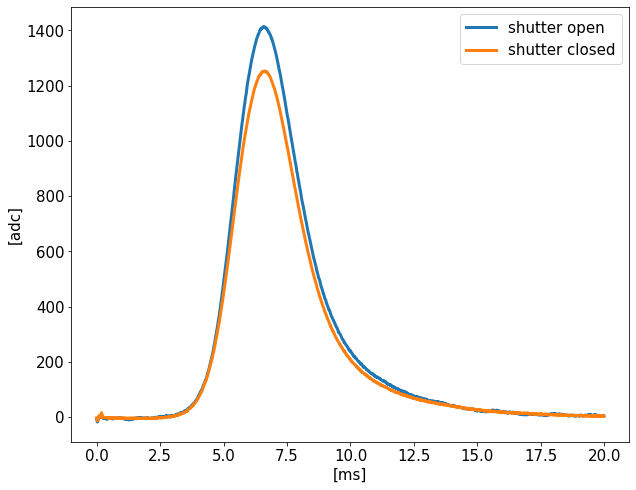

In [148]:
fname = "2020_3_11.hdf"
dset_name = "1583968032 decrease_power_rot_cooling"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

t = np.arange(0,20,1e-2)

shutter_open = np.mean(bin_state_data[1], axis = 0)
shutter_closed = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(shutter_open), label = 'shutter open', lw = 3)
ax.plot(t, background_subtraction(shutter_closed), label = 'shutter closed', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

print(background_subtraction(shutter_open).max()/background_subtraction(shutter_closed).max())

In [131]:
fname = "2020_3_11.hdf"
dset_name = "1583968748 scan_P2_F1"
devices = ('Laser Lock', 'Wavelength', 'ZaberTMM', 'SynthHDPro')
pxie, pxie_time, data_devices = load_measurement_data_devices(fname, dset_name, devices)
ch = 2
pmt_channel = 2
switching_channel = 3
threshold = 500
switch_state
switch_state = {idx_pxie:traces[:,switching_channel].mean() > threshold for idx_pxie, traces in pxie.items()}
idx_pairs = {idx_pxie: find_nearest_idx(data_devices['Laser Lock']['time'], t_pxie) for idx_pxie, t_pxie in pxie_time.items()}
integrals_unsorted = [-np.trapz(pxie[idx][250:1900, ch]-np.mean(pxie[idx][50:200, ch])) for idx in range(1, max(pxie_time.keys())+1)]
sorted_pxie_indices = np.array(list(idx_pairs.keys()))
sorted_pxie_indices.sort()
integrals, freqs = combine_arrays_irregular(sorted_pxie_indices-1, integrals_unsorted, 
                                            [idx_pairs[idx] for idx in sorted_pxie_indices], data_devices['Laser Lock']['laser 1 frequency'])
bins, bin_data_idx = bin_data(list(switch_state.values()), list(pxie.keys()))
freqs_light_off = np.array(freqs)[np.array(bin_data_idx[0]).astype(int)-1]
freqs_light_on = np.array(freqs)[np.array(bin_data_idx[1]).astype(int)-1]

integrals_light_off = [integrals[idx-1] for idx in bin_data_idx[0]]
integrals_light_on = [integrals[idx-1] for idx in bin_data_idx[1]]

traces_light_off = [pxie[idx] for idx in bin_data_idx[0]]
traces_light_on = [pxie[idx] for idx in bin_data_idx[1]]
width = 5
bins_light_off, bin_data_light_off = bin_data(freqs_light_off, integrals_light_off, width = width)
bins_light_on, bin_data_light_on = bin_data(freqs_light_on, integrals_light_on, width = width)
bin_data_light_off = filter_negative_integrals(bin_data_light_off)
bin_data_light_on = filter_negative_integrals(bin_data_light_on)

bin_data_light_off_avg = average_binned_data(bins_light_off, bin_data_light_off)
bin_data_light_on_avg = average_binned_data(bins_light_on, bin_data_light_on)

width = 5
bins_light_off_trace, bin_data_light_off_trace = bin_data(freqs_light_off, traces_light_off, width = width)
bins_light_on_trace, bin_data_light_on_trace = bin_data(freqs_light_on, traces_light_on, width = width)

# bin_data_light_off_avg = average_binned_data(bins_light_off, bin_data_light_off)
# bin_data_light_on_avg = average_binned_data(bins_light_on, bin_data_light_on)

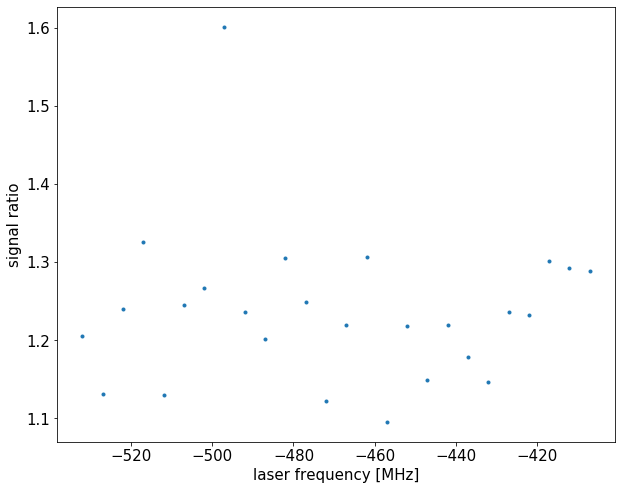

In [124]:
fig, ax = plt.subplots(figsize = (10,8))

ax.plot(bins_light_on, 
            np.array([bin_data_light_on_avg[b][0] for b in bins_light_on])/np.array([bin_data_light_off_avg[b][0] for b in bins_light_off]),
            '.')
ax.set_xlabel('laser frequency [MHz]')
ax.set_ylabel('signal ratio')

set_fontsize(ax, 15)

-487.000000 MHz


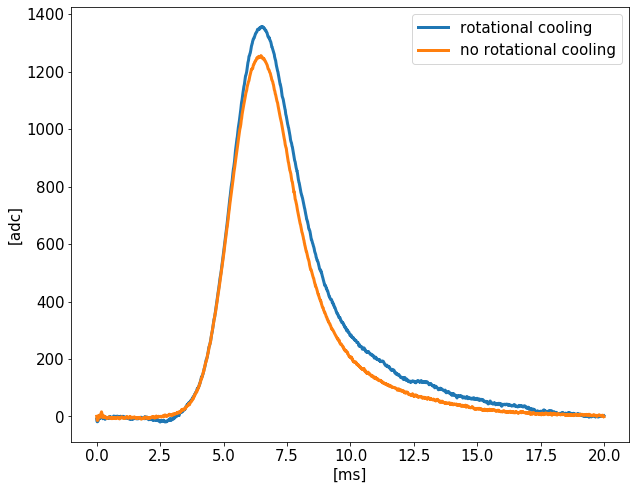

In [145]:
idx = 9
frequency = list(bin_data_light_off_trace.keys())[idx]
background_subtraction = lambda x: x - np.mean(np.concatenate((x[50:200], x[-150:])))

print(f'{frequency:f} MHz')

t = np.arange(0,20,1e-2)

depletion = -np.mean(bin_data_light_on_trace[frequency],axis = 0)[:,pmt_channel] 
no_depletion = -np.mean(bin_data_light_off_trace[frequency],axis = 0)[:,pmt_channel]

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(depletion), label = 'rotational cooling', lw = 3)
ax.plot(t, background_subtraction(no_depletion), label = 'no rotational cooling', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

## Somehow switch trigger polarity got reversed after here, fixed arduino code to prevent this in future

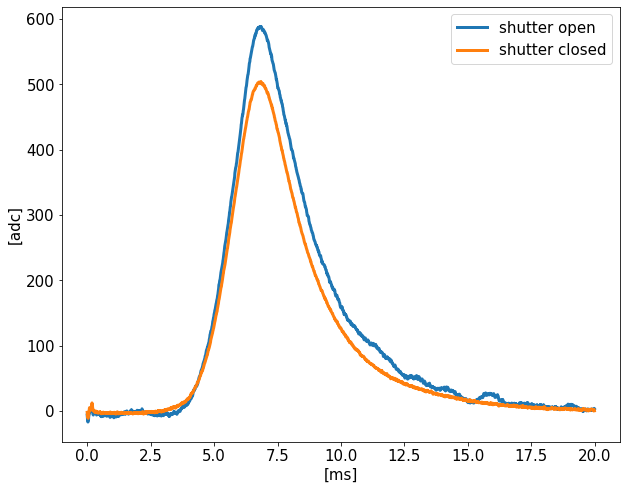

In [143]:
fname = "2020_3_11.hdf"
dset_name = "1583970982 rotational_cooling_off_resonance_switching_onoff"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

t = np.arange(0,20,1e-2)

shutter_open = np.mean(bin_state_data[0], axis = 0)
shutter_closed = np.mean(bin_state_data[1], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(shutter_open), label = 'shutter open', lw = 3)
ax.plot(t, background_subtraction(shutter_closed), label = 'shutter closed', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

## Fixed arduino after here

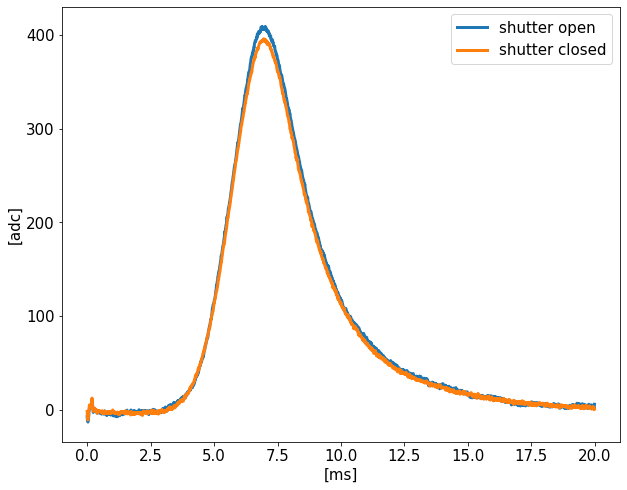

In [150]:
fname = "2020_3_11.hdf"
dset_name = "1583973288 rotational_cooling_off_resonance_switching_onoff_low_power_rot_cooling"
pmt_channel = 2
switching_channel = 3

switch_state, bin_state_data, ratio = bin_dataset_switching(fname, dset_name, pmt_channel, switching_channel)

t = np.arange(0,20,1e-2)

shutter_open = np.mean(bin_state_data[1], axis = 0)
shutter_closed = np.mean(bin_state_data[0], axis = 0)

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(t, background_subtraction(shutter_open), label = 'shutter open', lw = 3)
ax.plot(t, background_subtraction(shutter_closed), label = 'shutter closed', lw = 3)

ax.set_xlabel('[ms]')
ax.set_ylabel('[adc]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)